In [1]:
#! git clone https://github.com/wbasener/UPWINS_Spectral_Library

In [2]:
import spectral
import spectral.io.envi as envi
from matplotlib import pyplot as plt
import interactive_plot as ip
import pandas as pd
import numpy as np
import os
import sys

# Set current working directory to location of the notbook
#os.chdir(sys.path[0])

# Read the spectral library using the spectral package
lib = envi.open('UPWINS_spectral_library_6_25_2024.hdr')

In [3]:
# create a function to search spectra names for a stringmatch and return indices for matches
def name_search(lib, str):
    return [lib.names.index(name) for name in lib.names if str in name]

Plot a single spectrum

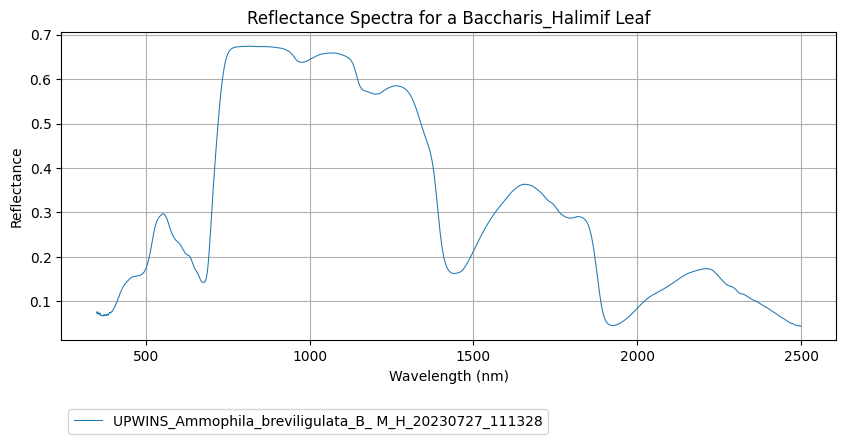

In [4]:
# Plot the first spectrum
plt.figure(figsize=(10,4))
plt.plot(lib.bands.centers, lib.spectra[0], label=lib.names[0], linewidth=0.75)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.grid(True)
plt.title('Reflectance Spectra for a Baccharis_Halimif Leaf')
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2);

Plot all spectra whose name is a given species (Solidago_sempervirens) and plant part (L = leaf)

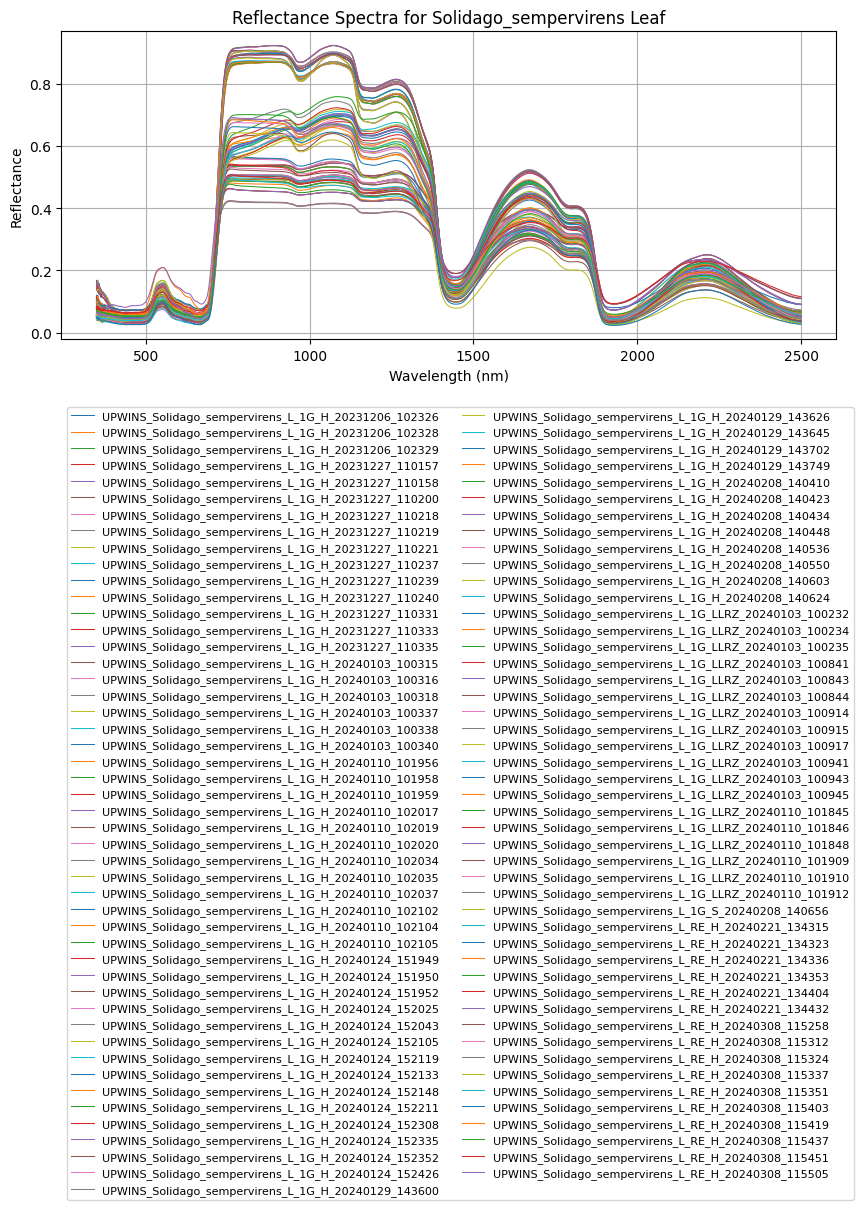

In [5]:
# get indices for spectra whose name contains 'Solidago_sempervirens_L'
indices = name_search(lib, 'Solidago_sempervirens_L')

# Plot the first spectrum
plt.figure(figsize=(10,4))
for i in indices:
    plt.plot(lib.bands.centers, lib.spectra[i], label=lib.names[i], linewidth=0.75)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance Spectra for Solidago_sempervirens Leaf')
plt.grid(True)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2, fontsize=8);

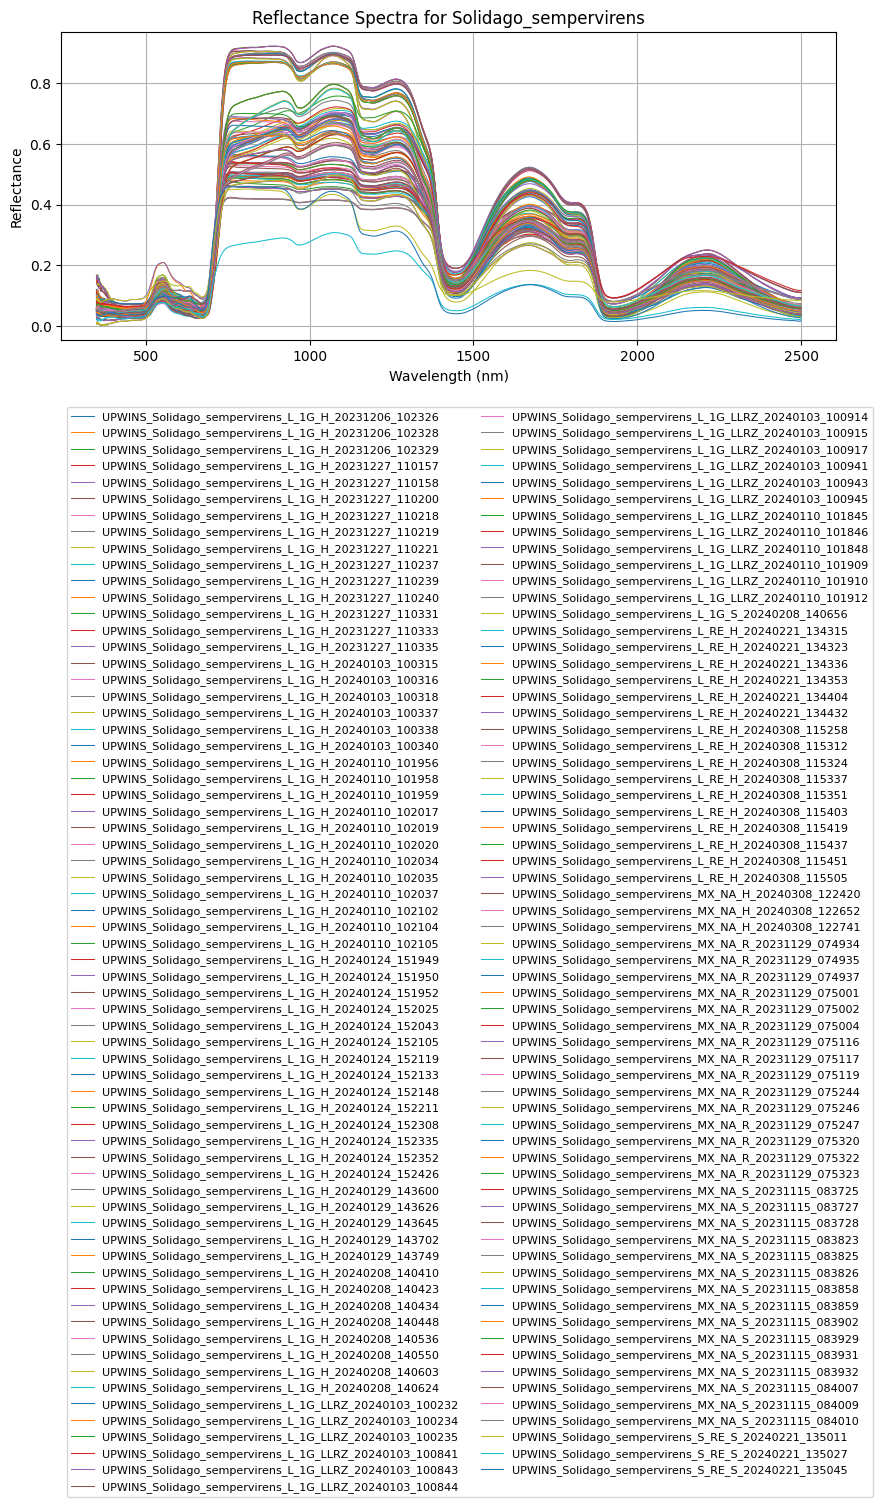

In [6]:
# get indices for spectra whose name starts with 'Baccharis_Halimif_L'
indices = name_search(lib, 'Solidago_sempervirens')

# Plot the first spectrum
plt.figure(figsize=(10,4))
for i in indices:
    plt.plot(lib.bands.centers, lib.spectra[i], label=lib.names[i], linewidth=0.75)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance Spectra for Solidago_sempervirens')
plt.grid(True)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2, fontsize=8);

Plot spectra for threee species

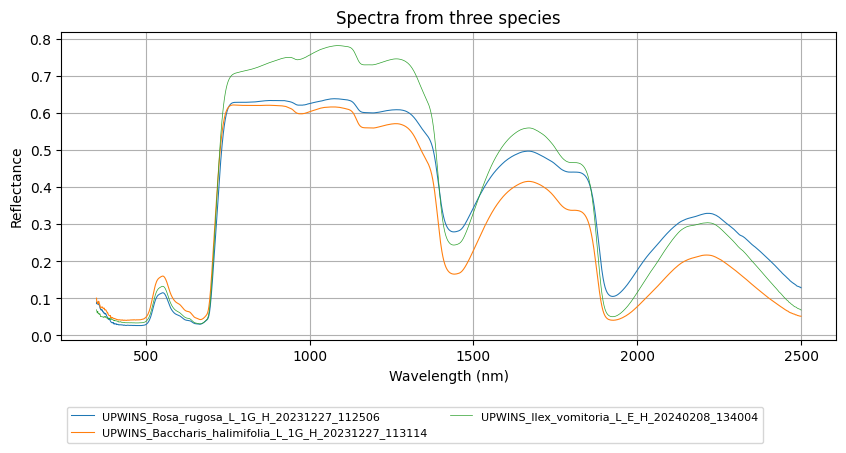

In [7]:
# get indices for spectra whose name contains 'Rosa_rugosa_L'
indices_Rosa = name_search(lib, 'Rosa_rugosa_L')
# get indices for spectra whose name contains 'Baccharis_halimifolia_L'
indices_Bacc = name_search(lib, 'Baccharis_halimifolia_L')
# get indices for spectra whose name contains 'Ilex_vomitoria_L'
indices_Ilex = name_search(lib, 'Ilex_vomitoria_L')

# Plot the spectra
plt.figure(figsize=(10,4))
n = 4
plt.plot(lib.bands.centers, lib.spectra[indices_Rosa[n]], label=lib.names[indices_Rosa[n]], linewidth=0.75)
plt.plot(lib.bands.centers, lib.spectra[indices_Bacc[n]], label=lib.names[indices_Bacc[n]], linewidth=0.775)
plt.plot(lib.bands.centers, lib.spectra[indices_Ilex[n]], label=lib.names[indices_Ilex[n]], linewidth=0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectra from three species')
plt.grid(True)
plt.legend(bbox_to_anchor=(0, -0.2), loc='upper left', ncol=2, fontsize=8);

# Interactive Plots

In [8]:
df = pd.read_csv('UPWINS_spectra_metadata_6_25_2024.csv')
nSpec, nBands = lib.spectra.shape
wl = np.asarray(lib.bands.centers)
spectra_arr = lib.spectra

In [9]:
class_names = []
for _,row in df.iterrows():
    class_names.append(str(row['genus'])+'_'+str(row['species']))
class_names = np.asarray(class_names)

ip.plot(wl, lib.spectra, class_names)

In [10]:
idx_keep = []
for i in range(nSpec):
    if np.max(np.abs(spectra_arr[i,1:] - spectra_arr[i,:-1])) < 0.2:
        idx_keep.append(i)
idx_keep = np.asarray(idx_keep)

ip.plot(wl, lib.spectra[idx_keep,:], class_names[idx_keep])